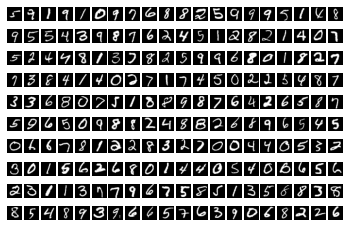

In [32]:
# Import libraries and modules 
# Import libraries and modules 
import numpy as np
import time 
np.random.seed(123)
 # for reproducibility
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
import tensorflow as tf 


from tensorflow import keras
from keras import Sequential, Model, Input 
from keras.layers import Conv2DTranspose, Reshape, Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D, Input 
#from utilitaire import affiche 
################################################## 
# I - Load pre-shuffled MNIST data train and test sets 
################################################## 
from keras.datasets.mnist import load_data
from matplotlib import pyplot
 # load dataset
(X_train, y_train), (X_test, y_test) = load_data() 
X_train, pipo, y_train, pipo = train_test_split(X_train, y_train, test_size=0.9) 
X_test, pipo, y_test, pipo = train_test_split(X_test, y_test, test_size=0.9) 

for i in range(200): 
  plt.subplot(10,20,i+1) 
  plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray') 
  plt.axis('off') 
plt.show() 
  # Preprocess input data 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) 
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255 
X_test /= 255
 # Preprocess class labels Y_train = tf.keras.utils.to_categorical(y_train, 10)

Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
""" Combien y a-t-il d’images dans la base de test ? 
Dans la base d’apprentissage ? Quelle est la taille des images ? 
Combien y a-t-il de classes ?"""


' Combien y a-t-il d’images dans la base de test ? \nDans la base d’apprentissage ? Quelle est la taille des images ? \nCombien y a-t-il de classes ?'

In [18]:
print("Images dans la base test : " , np.shape(X_test))
print("Images dans la base d'apprentissage : " , np.shape(X_train))
""" Nombre de classes """


print("Il y'a {} classes".format(len(np.unique(y_train))))

print("taille de y_train : ",np.shape(y_train))
print("taille de Y_train : ",np.shape(Y_train))

Images dans la base test :  (1000, 28, 28, 1)
Images dans la base d'apprentissage :  (6000, 28, 28, 1)
Il y'a 10 classes
taille de y_train :  (6000,)
taille de Y_train :  (6000, 10)


A quoi sert la fonction tf.keras.utils.to_categorical ? : 
Converts a class vector (integers) to binary class matrix.



In [15]:
# II. Régression logistique
  # II.1. définition du réseau

In [57]:
inputs = Input(shape=(28,28,1)) 
x = inputs 
x=Flatten()(x) 
outputs=Dense(10, activation='softmax')(x)
model = Model(inputs, outputs) 
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


 Pourquoi utilise-t-on la fonction d’activation softmax ?

La fonction d’activation sert avant tout à modifier de manière non-linéaire les données. Cette non-linéarité permet de modifier spatialement leur représentation.

Dit simplement, la fonction d’activation permet de changer notre manière de voir une donnée.

Combien y a-t-il de paramètres à apprendre : 

A quoi sert la commande Flatten ? : Return a copy of the array collapsed into one dimension.

In [19]:
# II.2. Apprentissage

In [58]:
def affiche(history):
# summarize history for accuracy 
  plt.plot(history.history['accuracy']) 
  plt.plot(history.history['val_accuracy']) 
  plt.title('model accuracy') 
  plt.ylabel('accuracy') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.show() 
# summarize history for loss 
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss']) 
  plt.title('model loss') 
  plt.ylabel('loss') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.show()

Epoch 1/350


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


24/24 [==============================] - 1s 11ms/step - loss: 2.2045 - accuracy: 0.2128 - val_loss: 2.0465 - val_accuracy: 0.3380
Epoch 2/350
24/24 [==============================] - 0s 5ms/step - loss: 1.9759 - accuracy: 0.4122 - val_loss: 1.8532 - val_accuracy: 0.5210
Epoch 3/350
24/24 [==============================] - 0s 5ms/step - loss: 1.7967 - accuracy: 0.5663 - val_loss: 1.6943 - val_accuracy: 0.6200
Epoch 4/350
24/24 [==============================] - 0s 5ms/step - loss: 1.6487 - accuracy: 0.6543 - val_loss: 1.5607 - val_accuracy: 0.6830
Epoch 5/350
24/24 [==============================] - 0s 5ms/step - loss: 1.5245 - accuracy: 0.7083 - val_loss: 1.4481 - val_accuracy: 0.7230
Epoch 6/350
24/24 [==============================] - 0s 5ms/step - loss: 1.4198 - accuracy: 0.7302 - val_loss: 1.3530 - val_accuracy: 0.7500
Epoch 7/350
24/24 [==============================] - 0s 5ms/step - loss: 1.3309 - accuracy: 0.7552 - val_loss: 1.2721 - val_accuracy: 0.7680
Epoch 8/350
24/24 [=====

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


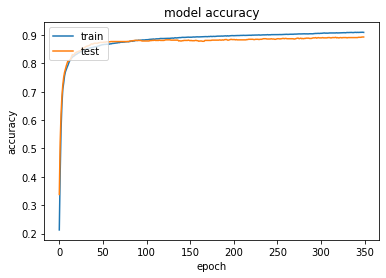

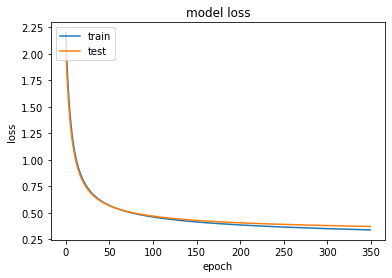

lr= 0.01 batch_size= 256 epochs= 350
Temps d apprentissage 49.22683299999994


In [59]:
lr= 0.01
batch_size=256 
epochs=350
sgd1= tf.keras.optimizers.SGD(learning_rate=lr) 
model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy']) 
tps1 = time.clock() 
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
verbose=1,validation_data=(X_test, Y_test)) 
tps2 = time.clock() 
#from utilitaire import affiche 
affiche(history) #donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

Que représente lr, batch et epochs ? \
 Pourquoi utilise-t-on 'categorical_crossentropy’ comme fonction perte ?\
 Commenter ligne à ligne le programme. Quelle fonction perte est utilisée ?\
 Que réalise la fonction affiche(history) donnée en annexe? Est-ce que l’apprentissage se passe bien ?\

lr == learning rate \
batch == sous ensemble de la base d’apprentissage\
epochs ==  nombre de fois que tous les exemples sont vus en apprentissage\


'categorical_crossentropy’ : Computes the categorical crossentropy loss.

affiche(history) affiche la precision et la perte

In [ ]:
# II.3. Evaluation du modèle

In [61]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]*100) 
y_pred = model.predict(X_test) 
y_pred = y_pred.argmax(axis=-1) 
print('Confusion Matrix') 
print(confusion_matrix(y_test, y_pred))

Test loss: 0.3729651868343353
Test accuracy: 89.30000066757202
Confusion Matrix
[[ 83   0   1   0   0   1   0   0   0   0]
 [  0 110   0   1   0   0   1   0   1   0]
 [  0   2  90   0   3   0   4   3   4   1]
 [  0   0   2  90   0   5   1   1   2   0]
 [  0   0   1   0  84   0   1   0   2   8]
 [  0   2   0   5   0  69   1   3   6   2]
 [  2   1   0   0   1   2  99   1   0   0]
 [  0   1   3   1   1   0   0  96   0   4]
 [  0   1   1   4   2   2   0   2  80   0]
 [  1   2   0   0   5   1   0   5   0  92]]


Que renvoie model.predict et pourquoi utilise-t-on y_pred.argmax ?

predict : Generates output predictions for the input samples.
Computation is done in batches. This method is designed for batch processing of large numbers of inputs. It is not intended for use inside of loops that iterate over your data and process small numbers of inputs at a time.





In [56]:
# III. MLP

In [ ]:
""" Reprendre toutes les questions précédentes en ajoutant 
une couche cachée à 256 neurones et la fonction d’activation adéquate."""